In [ ]:
**Introduction:**



Which brings us too...



**The Metric:**

Now, we had some serious back and forth over just what our metric of greatness should be. All of our ideas were incredibly serious, professional, and if humor was present at all, it was incredibly high brow. So it should be no surprise that the idea we chose to investigate further is as serious as one can get: **Frogger**.

Let me explain. What is Pittsburgh a city of? It's a city of roads, of pedestrians, of public transportation that takes a tumble from time to time. Case in point:

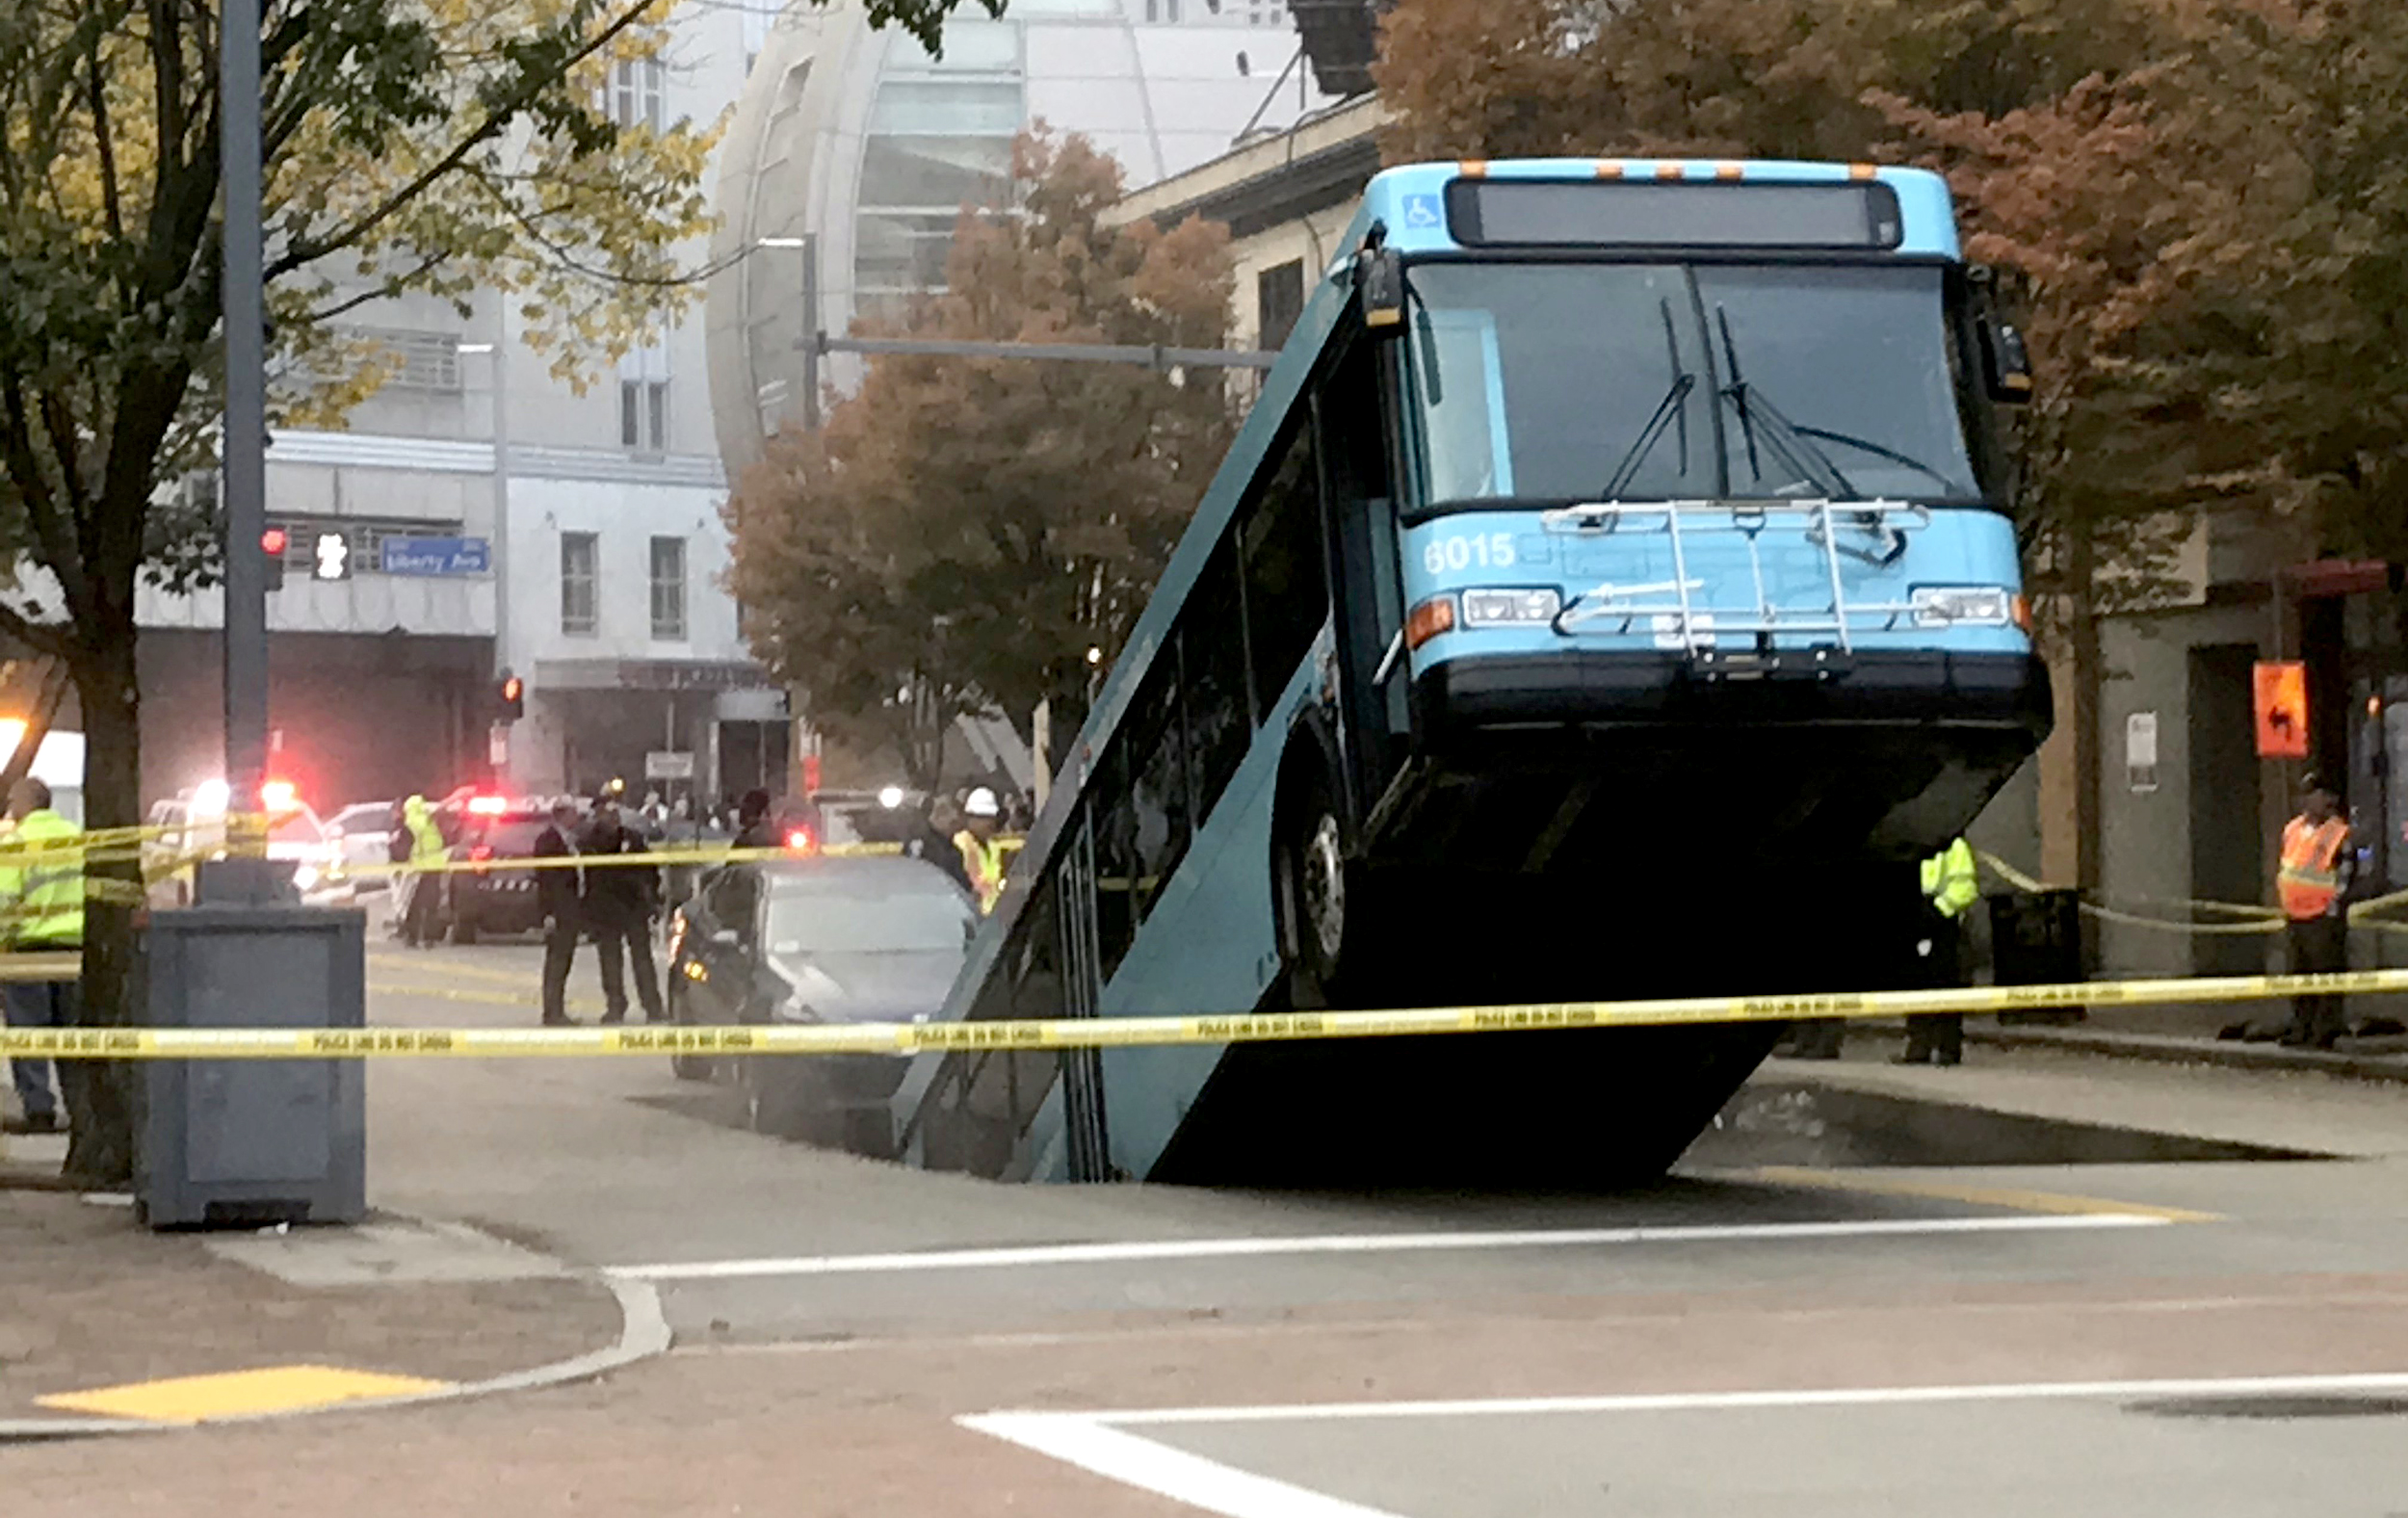

However, Pittsburgh is increasingly a city of tourism, if the ongoing and planned construction around the Rivers Casino is any indicator. And if tourists want anything, it's a chance to have fun, to live a little! And what better passtime could anyone ask for than **Real Life Frogger**?

For those among you that are a tad confused, the gameplay loop of **Real Life Frogger** consists of the following components:

* Find a road with a sidewalk on both ends
* Position yourself on one side of the road, at a point where there are no stop signs, yield signs, traffic lights, or crosswalks
* (Attempt to) Cross the road

Simple, rewarding, invigorating, and fun for the whole family.

So, if we want to decide the best neighborhood in the city in which to play **Real Life Frogger**, we have to consider what kind of experience the average player would desire, and the only correct answer there is the most exhilarating game possible. Therefore, the best neighborhood in the city in which to play **Real Life Frogger** is the neighborhood that is the most unsafe for pedestrians, specifically those that do not limit themselves to crosswalks and the whims of the little red hand in the yellow box on the stoplight pole. That means we're looking for the places where cars go fast, go over the speed limit, and crash often, and we're looking for neighborhoods with unsafe road conditions and little to no traffic signage, further decreasing the safety of the average pedestrian and increasing the fun potential of the average **Real Life Frogger** enjoyer.

Now, some housekeeping first:

In [1]:
import pandas as pd
import numpy as np

neighborhood_sqmile_dict = {'Allegheny Center': 0.21,
                                'Allegheny West': 0.14,
                                'Allentown': 0.30,
                                'Arlington': 0.49,
                                'Arlington Heights': 0.11,
                                'Banksville': 0.97,
                                'Bedford Dwellings': 0.18,
                                'Beechview': 1.46,
                                'Beltzhoover': 0.41,
                                'Bloomfield': 0.70,
                                'Bluff': 0.33,
                                'Bon Air': 0.32,
                                'Brighton Heights': 1.13,
                                'Brookline': 2.09,
                                'California-Kirkbride': 0.22,
                                'Carrick': 1.67,
                                'Central Business District': 0.65,
                                'Central Lawrenceville': 0.96,
                                'Central Northside': 0.26,
                                'Central Oakland': 0.28,
                                'Chartiers City': 0.13,
                                'Chateau': 0.38,
                                'Crafton Heights': 0.75,
                                'Crawford-Roberts': 0.26,
                                'Duquesne Heights': 0.62,
                                'East Allegheny': 0.24,
                                'East Carnegie': 0.43,
                                'East Hills': 0.54,
                                'East Liberty': 0.58,
                                'Elliot': 0.61,
                                'Esplen': 0.23,
                                'Fairywood': 0.97,
                                'Fineview':  0.25,
                                'Friendship': 0.11,
                                'Garfield': 0.46,
                                'Glen Hazel': 0.46,
                                'Greenfield': 0.78,
                                'Hays': 1.73,
                                'Hazelwood': 1.59,
                                'Highland Park': 1.12,
                                'Homewood North': 0.43,
                                'Homewood South': 0.39,
                                'Homewood West': 0.20,
                                'Knoxville': 0.30,
                                'Larimer': 0.45,
                                'Lincoln Place': 0.98,
                                'Lincoln‐Lemington‐Belmar': 1.78,
                                'Lower Lawrenceville': 0.43,
                                'Manchester': 0.28,
                                'Marshall‐Shadeland': 1.24,
                                'Middle Hill': 0.31,
                                'Morningside': 0.37,
                                'Mount Washington': 1.15,
                                'Mt. Oliver': 0.10,
                                'New Homestead': 0.79,
                                'North Oakland': 0.50,
                                'North Shore': 0.30,
                                'Northview Heights': 0.31,
                                'Oakwood': 0.25,
                                'Overbrook': 0.84,
                                'Perry North': 1.24,
                                'Perry South': 0.92,
                                'Point Breeze': 1.00,
                                'Point Breeze North': 0.29,
                                'Polish Hill': 0.25,
                                'Regent Square': 0.20,
                                'Ridgemont': 0.36,
                                'Shadyside': 0.92,
                                'Sheraden': 0.89,
                                'South Oakland': 0.51,
                                'South Shore': 0.22,
                                'Southside Flats': 0.91,
                                'Southside Slopes': 0.72,
                                'Spring Garden': 0.26,
                                'Spring Hill‐City View': 0.64,
                                'Squirrel Hill North': 1.22,
                                'Squirrel Hill South': 2.68,
                                'St. Clair': 0.31,
                                'Stanton Heights': 0.74,
                                'Strip District': 0.62,
                                'Summer Hill': 0.41,
                                'Swisshelm Park': 0.47,
                                'Terrace Village': 0.45,
                                'Troy Hill': 0.47,
                                'Upper Hill': 0.31,
                                'Upper Lawrenceville': 0.41,
                                'West End': 0.20,
                                'West Oakland': 0.11,
                                'Westwood': 0.69,
                                'Windgap': 0.42}

neighborhood_area_vals = neighborhood_sqmile_dict.values()
neighborhood_area_vals = list(neighborhood_area_vals)
neighborhood_area_keys = neighborhood_sqmile_dict.keys()
neighborhood_area_keys = list(neighborhood_area_keys)

That's better. And don't worry about that dictionary for now, *it's a surprise tool that will help us later.* Now, time to look at some *Interesting Numbers*. We pulled data from a few different publicly-available datasets from WPRDC, and we'll introduce them as we look at them to keep things from getting too confusing. And according to the order I arbitrarily wrote a few paragraphs ago, the first sub-metric we're looking at is speed: where is there regularly a lot of cars, where do they go the fastest, and where do they go over the speed limit most often.

Here, we used a Average Car Traffic & Speed dataset (https://data.wprdc.org/dataset/traffic-count-data-city-of-pittsburgh/resource/6dfd4f8f-cbf5-4917-a5eb-fd07f4403167), looking at which neighborhoods had the highest daily average car traffic, and the highest percentage of cars driving over the speed limit within the operation time of the recording devices used to gather data for this set. We also factored in the median speed of cars travelling in each neighborhood. First 

**The Best Neighborhood (for playing Real Life Frogger):**



**Conclusion:**

**Aidan:**

**Aaron:**